In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tfrbm import BBRBM, GBRBM
import pickle
from collections import Counter

In [2]:
with open("mags.p", "rb") as f:
    data = pickle.load(f)

In [3]:
mags_ = np.array([item for sublist in [d[0] for d in data] for item in sublist])
kappas = np.array([item for sublist in [d[1] for d in data] for item in sublist])

In [4]:
kappa_values = [x for x  in Counter(kappas)]

In [5]:
idx = np.where(kappas == kappa_values[13])

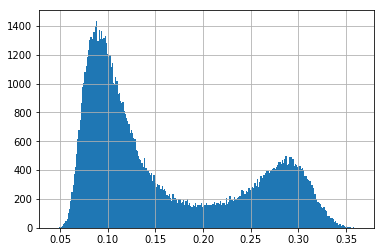

In [6]:
plt.hist(mags_[idx], bins=256)
plt.grid()
plt.show()

In [64]:
preX = np.random.choice(mags_[idx][:10000], size=(100000, 10))
min_mag = min(mags_[idx][:10000])
max_mag = max(mags_[idx][:10000])
range_mag = max_mag - min_mag
min_mag -= 0.05*range_mag
max_mag += 0.05*range_mag
bins = np.linspace(min_mag, max_mag, 256+1)
mags = (bins[1:] + bins[:-1]) / 2
X = [np.histogram(x, bins=bins)[0] for x in preX]
X = np.array([x/max(x) for x in X])

Epoch: 0
Train error: 0.0781

Epoch: 1
Train error: 0.0459

Epoch: 2
Train error: 0.0372

Epoch: 3
Train error: 0.0332

Epoch: 4
Train error: 0.0310



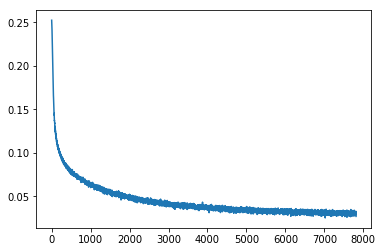

In [65]:
#bbrbm = GBRBM(n_visible=128, n_hidden=64, learning_rate=0.01, momentum=0.95, err_function='mse', use_tqdm=False, sample_visible=True, sigma=0.1)
bbrbm = BBRBM(n_visible=256, n_hidden=64, learning_rate=0.01, momentum=0.95, use_tqdm=False)
errs = bbrbm.fit(X, n_epoches=5, batch_size=64)
plt.plot(errs)
plt.show()

In [69]:
new_samples_ = np.array([bbrbm.reconstruct(X[np.random.randint(0, X.shape[0])].reshape(1, -1))[0] for i in range(1000)])
new_samples = np.average(new_samples_, axis=0)

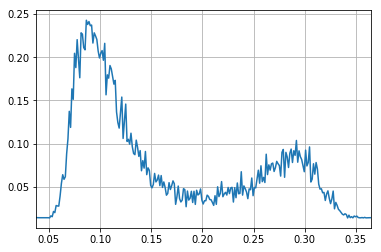

In [70]:
plt.plot(mags, new_samples)
plt.grid()
plt.xlim([min(mags), max(mags)])
plt.show()

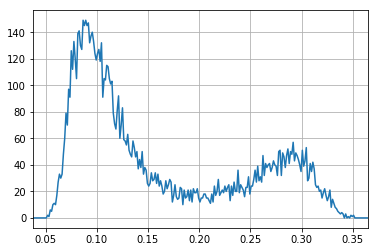

In [71]:
original = np.histogram(mags_[idx][:10000], bins=bins)[0]
plt.plot(mags, original)
plt.xlim([min(mags), max(mags)])
plt.grid()
plt.show()

In [96]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.uint8)
X = [[0,0,0,0],[1,1,1,1],[3,3,3,3],[0,1,1,3], [1,1,3,0]]
n = enc.fit_transform(X)
print(n.size * n.itemsize)

AttributeError: itemsize not found

In [97]:
print(n.data.nbytes)

20


In [99]:
np.ones(5, dtype=np.uint8)*3

array([3, 3, 3, 3, 3], dtype=uint8)

In [101]:
from functools import partial

def multiply(x,y):
        return (x+1) * y

# create a new function that multiplies by 2
dbl = partial(multiply,y=2)
print(dbl(4))

10


In [ ]:
()